# Bank Telemarketing Campaign Case Study.
In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

## Problem Statement:
 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.

## What is the term Deposit?

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate.

#### Importing the libraries.¶

In [1]:
# import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Session- 2, Data Cleaning
### Segment- 2, Data Types
There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame.

Following are the some of the types of variables:

- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.

### Read in the Data set.

In [3]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0 = pd.read_csv("bank_marketing_updated_v1.csv")
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.

### Read the file without unnecessary headers.

In [4]:
#read the file in inp0 without first two rows as it is of no use.
inp0= pd.read_csv("bank_marketing_updated_v1.csv", skiprows=2)
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dropping customer id column. 

In [5]:
#drop the customer id as it is of no use.

inp0.drop("customerid", axis = 1, inplace = True)
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [6]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']= inp0["jobedu"].apply(lambda x:x.split(",")[0])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [7]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0['jobedu'].apply(lambda x:x.split(',')[1])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [8]:
#drop the "jobedu" column from the dataframe.
inp0.drop("jobedu", axis=1, inplace = True)


In [10]:
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [13]:
inp0[inp0.month.apply(lambda x:isinstance(x, float)) == True]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


 ### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### Checking for missing values 

In [15]:
inp0.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

#### Handling Missing Values 

In [18]:
inp0.age.isnull().sum()

20

In [19]:
inp0.shape

(45211, 19)

In [20]:
float(100.0*20/45211)

0.04423702196368141

#### As the percentage count is not that high, we can drop the records with age missing

#### Drop records with age missing 

In [22]:
inp1 = inp0[~inp0.age.isnull()].copy()
inp1.shape

(45191, 19)

In [23]:
inp1.age.isnull().sum()

0

#### Handling missing values in month

In [24]:
inp1.month.isnull().sum()

50

In [25]:
inp1.month.value_counts(normalize = True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

#### Estimate using the most popular month which is may is also an option but better than estimate we have the mode option

In [28]:
# Mode of the month

month_mode = inp1.month.mode()[0]
month_mode

'may, 2017'

#### Replace the null values in the month column with the month_mode which we calculated using filna() function

In [30]:
inp1.month.fillna(month_mode, inplace = True)
inp1.month.value_counts(normalize = True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [31]:
inp1.month.isnull().sum()

0

#### let's check the pdays variable

In [34]:
inp1.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [32]:
inp1.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

#### -1 indicates missing value

#### How do we handle this? 
#### Remember our objective !!!

	- We want the missing values to be ignored in the calculations
    - Simply make it missing - replace -1 with NAN
    - All summary statistics - mean, median etc will ignore the missing values.
    
#### We are not sure that the column is required or not at this stage. Hence we are not dropping the column

In [35]:
inp1.loc[inp1.pdays<0, "pdays"] = np.NaN
inp1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

#### Takeaway: Missing Values doesn't always have to be present as null

In [37]:
inp1.isnull().sum()

age              0
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays        36939
previous         0
poutcome         0
response        30
job              0
education        0
dtype: int64

### Segment 5 : Handling Outliers

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age Variable

In [38]:
inp1.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

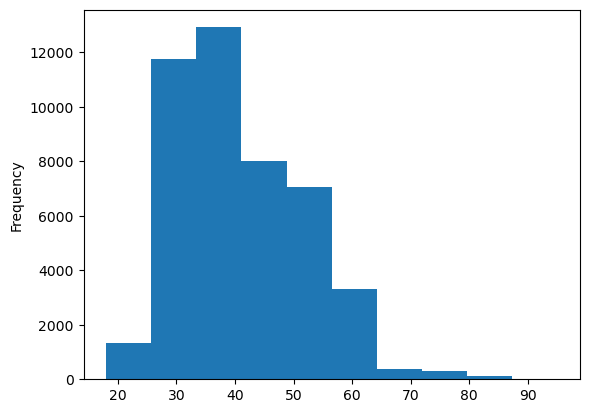

In [39]:
inp1.age.plot.hist()
plt.show()

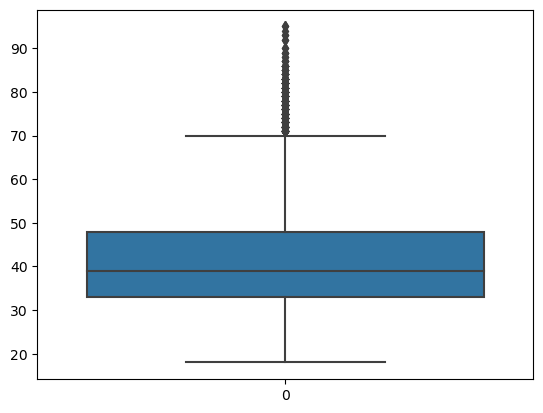

In [41]:
sns.boxplot(inp1.age)
plt.show()

#### Balance variable

In [42]:
inp1.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

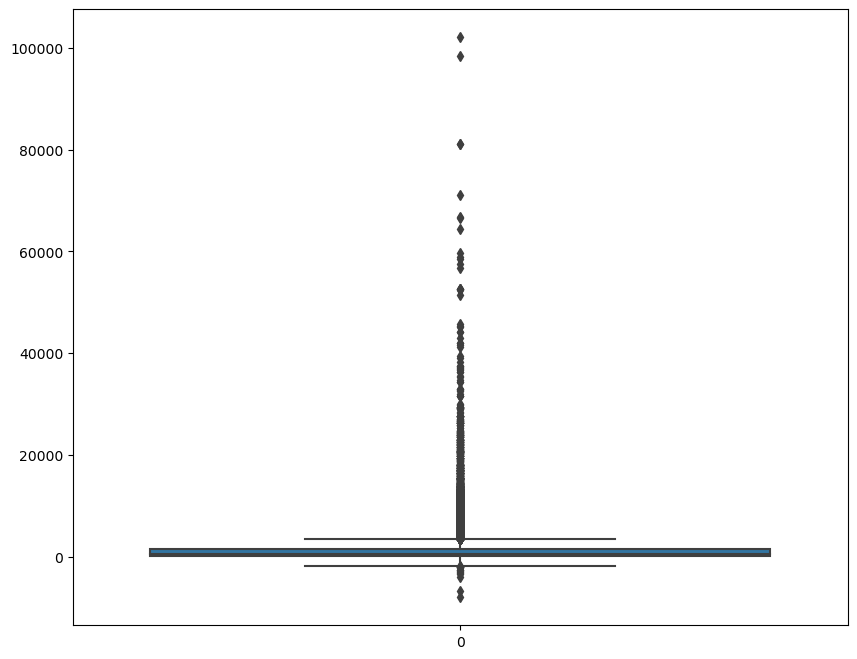

In [47]:
plt.figure(figsize = (10,8))
sns.boxplot(inp1.balance)
plt.show()

In [48]:
inp1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [49]:
inp1[inp1.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


#### Instead of looking at mean, we could look at quantiles/medians/percentiles instead

### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [50]:
inp1.duration.head(10)

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
5    139 sec
6    217 sec
7    380 sec
8     50 sec
9     55 sec
Name: duration, dtype: object

In [51]:
inp1.duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [54]:
inp1.duration = inp1.duration.apply(lambda x:float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

In [55]:
inp1.duration.describe()

count    45191.000000
mean         4.303030
std          4.292739
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [56]:
inp1.dtypes

age          float64
salary         int64
balance        int64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
response      object
job           object
education     object
dtype: object

## Session- 3, Univariate Analysis 

### Segment- 2: Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital Status

In [58]:
inp1.marital.value_counts()

married     27204
single      12786
divorced     5201
Name: marital, dtype: int64

In [60]:
inp1.marital.value_counts(normalize = True)

married     0.601978
single      0.282932
divorced    0.115089
Name: marital, dtype: float64

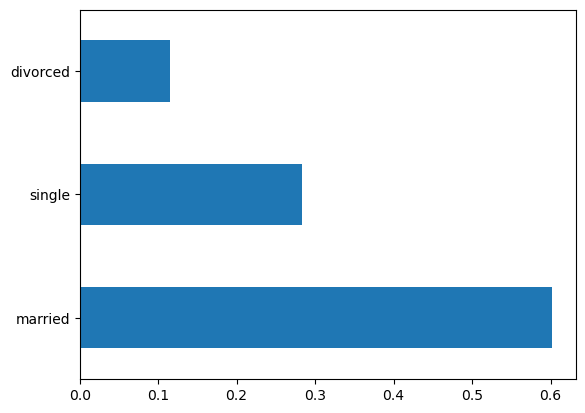

In [63]:
inp1.marital.value_counts(normalize = True).plot.barh()
plt.show()

#### Job 

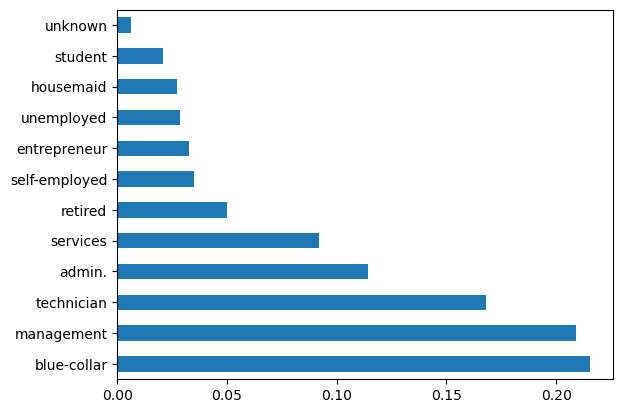

In [64]:
# Which of the two job categories are the least and the most contacted by the bank

inp1.job.value_counts(normalize = True).plot.barh()
plt.show()

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education variable 

In [66]:
inp1.education.value_counts()

secondary    23193
tertiary     13295
primary       6846
unknown       1857
Name: education, dtype: int64

In [67]:
inp1.education.value_counts(normalize = True)

secondary    0.513222
tertiary     0.294196
primary      0.151490
unknown      0.041092
Name: education, dtype: float64

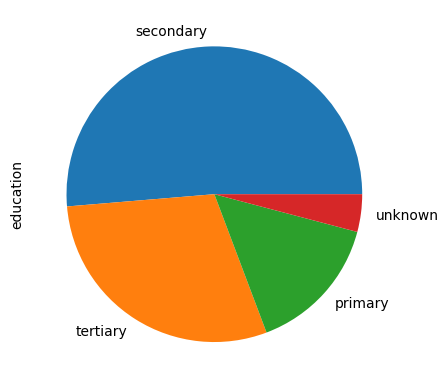

In [70]:
inp1.education.value_counts(normalize = True).plot.pie()
plt.show()

#### poutcome variable



In [71]:
inp1.poutcome.value_counts

<bound method IndexOpsMixin.value_counts of 0        unknown
1        unknown
2        unknown
3        unknown
4        unknown
          ...   
45206    unknown
45207    unknown
45208    success
45209    unknown
45210      other
Name: poutcome, Length: 45191, dtype: object>

In [72]:
inp1.poutcome.value_counts(normalize = True)

unknown    0.817508
failure    0.108384
other      0.040716
success    0.033392
Name: poutcome, dtype: float64

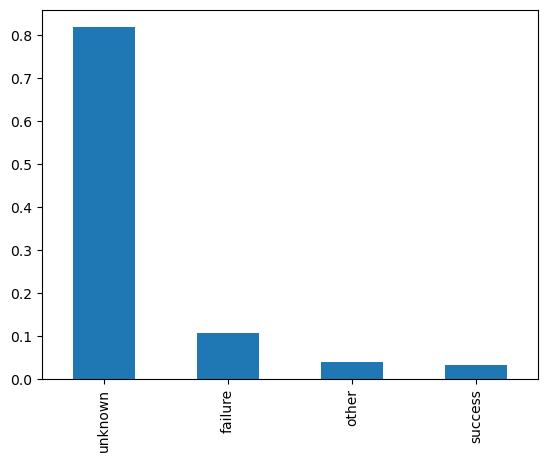

In [74]:
inp1.poutcome.value_counts(normalize = True).plot.bar()
plt.show()

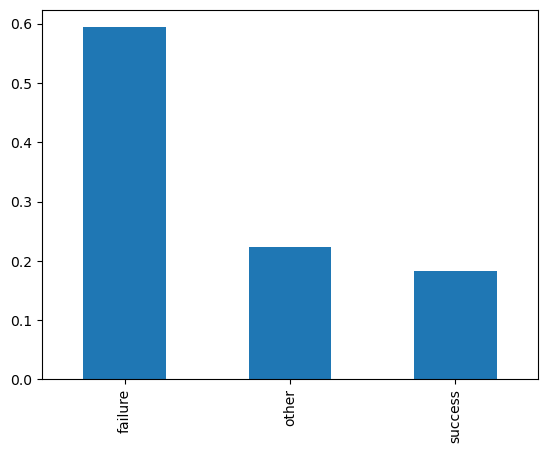

In [79]:
inp1[~(inp1.poutcome == 'unknown')].poutcome.value_counts(normalize = True).plot.bar()
plt.show()

#### Response - the target variable

In [76]:
inp1.response.value_counts(normalize = True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

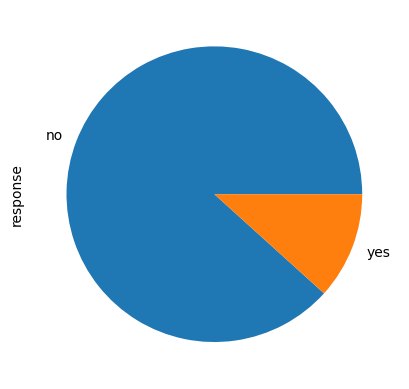

In [77]:
inp1.response.value_counts(normalize = True).plot.pie()
plt.show()

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 


There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

#### Numerical to Numerical

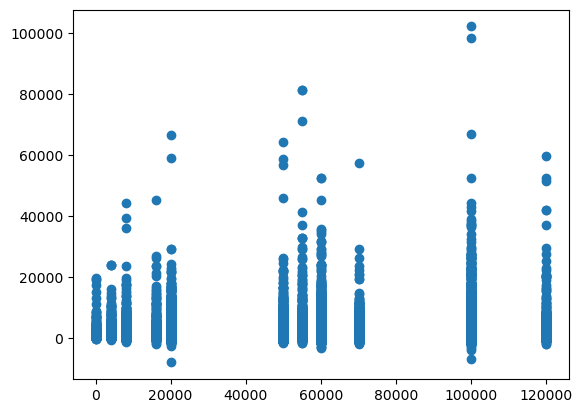

In [81]:
plt.scatter(inp1.salary, inp1.balance)
plt.show()

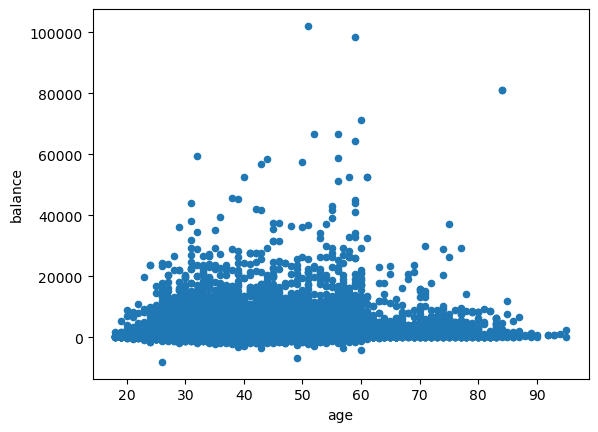

In [89]:
inp1.plot.scatter(x='age', y='balance')
plt.show()

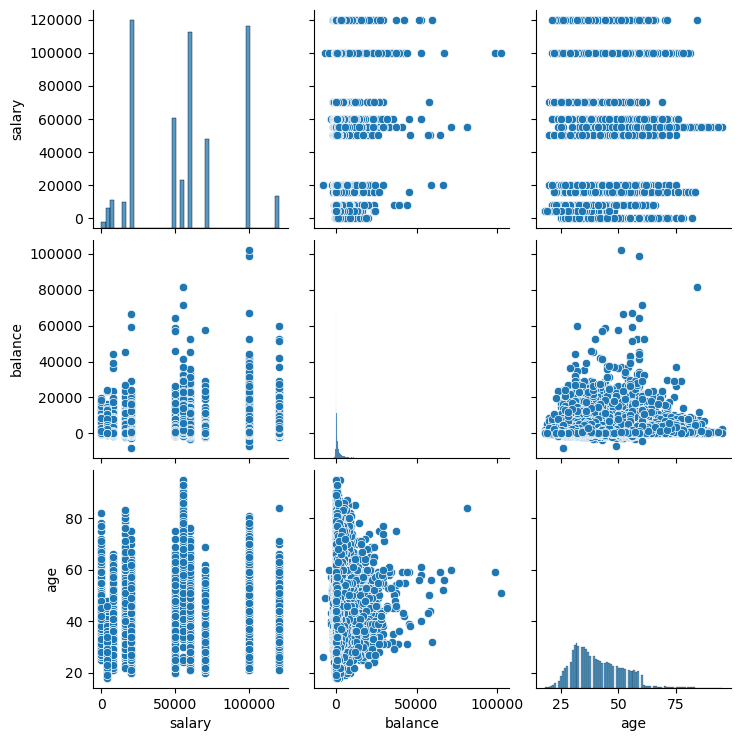

In [90]:
sns.pairplot(data = inp1, vars = ['salary', 'balance','age'])
plt.show()

#### Quantify using correlation values

In [92]:
inp1[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055505
balance,0.097755,0.055505,1.000000


#### Correlation Heatmap

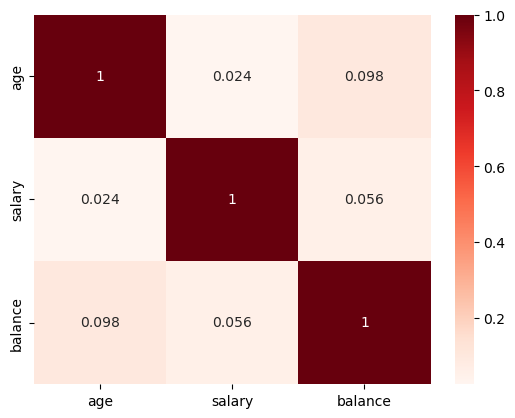

In [94]:
sns.heatmap(inp1[['age', 'salary','balance']].corr(), annot= True, cmap = 'Reds')
plt.show()

#### Categorical - Numerical 

In [96]:
inp1.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [97]:
inp1.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

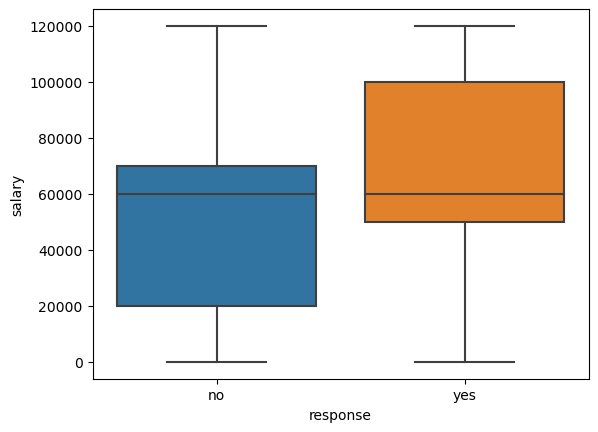

In [100]:
sns.boxplot(data = inp1, x = 'response', y='salary')
plt.show()

#### Response vs Balance

	- We know that balance is highly skewed - has very high values!!

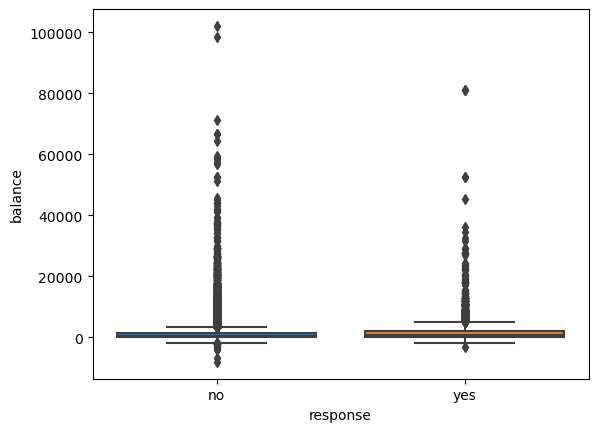

In [101]:
sns.boxplot(data = inp1, x = 'response', y = 'balance')
plt.show()

In [102]:
inp1.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [104]:
inp1.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

#### 75th Percentile 

In [105]:
def p75(x):
    return np.quantile(x,0.75)

In [108]:
inp1.groupby('response')['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


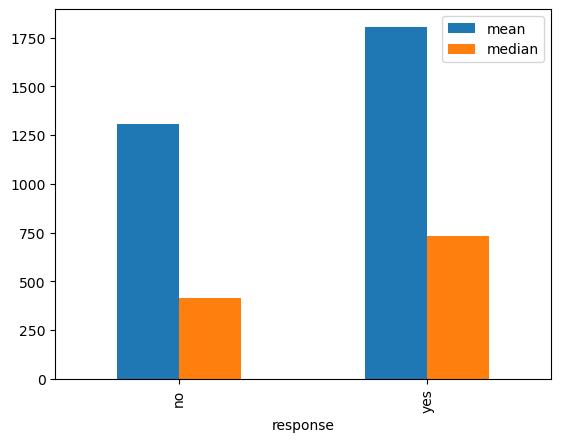

In [109]:
inp1.groupby('response')['balance'].aggregate(['mean','median']).plot.bar()
plt.show()

In [110]:
inp1.groupby('education')['salary'].mean()


education
primary      34224.510663
secondary    49736.127280
tertiary     82878.300113
unknown      46558.427571
Name: salary, dtype: float64

In [112]:
inp1.groupby('education')['salary'].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Categorical - Categorical 

In [113]:
inp1['response_flag'] = np.where(inp1.response == 'yes', 1,0)

In [114]:
inp1.response_flag.value_counts()

0    39906
1     5285
Name: response_flag, dtype: int64

In [116]:
inp1.response.value_counts()

no     39876
yes     5285
Name: response, dtype: int64

In [117]:
inp1.response.value_counts(normalize = True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

In [119]:
inp1.response_flag.mean()

0.11694806488017526

#### Education vs Response rate

In [120]:
inp1.groupby('education')['response_flag'].mean()

education
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64

#### Marital vs Response rate

In [122]:
inp1.groupby('marital')['response_flag'].mean()

marital
divorced    0.119400
married     0.101198
single      0.149460
Name: response_flag, dtype: float64

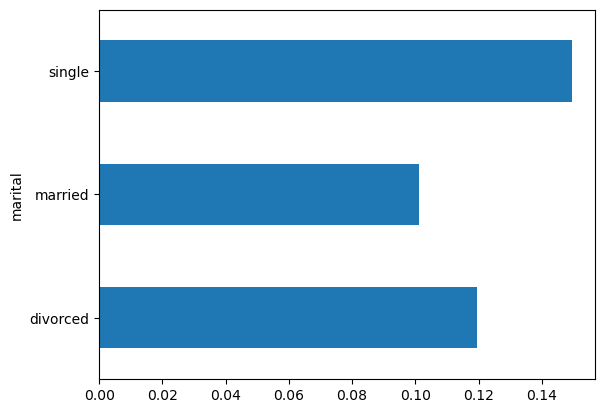

In [125]:
inp1.groupby('marital')['response_flag'].mean().plot.barh()
plt.show()

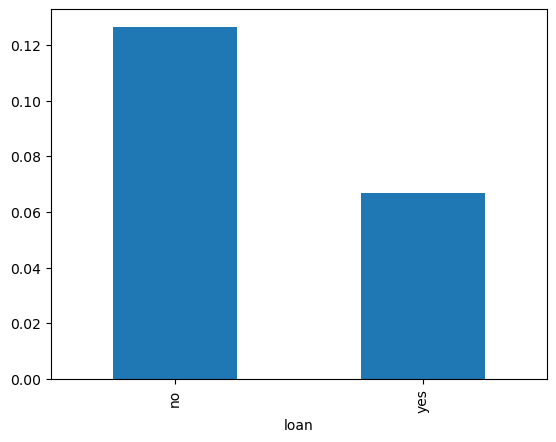

In [126]:
inp1.groupby('loan')['response_flag'].mean().plot.bar()
plt.show()

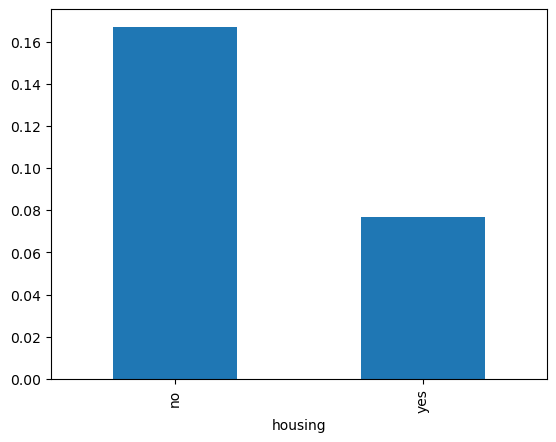

In [128]:
inp1.groupby('housing')['response_flag'].mean().plot.bar()
plt.show()

#### Age vs Response rate

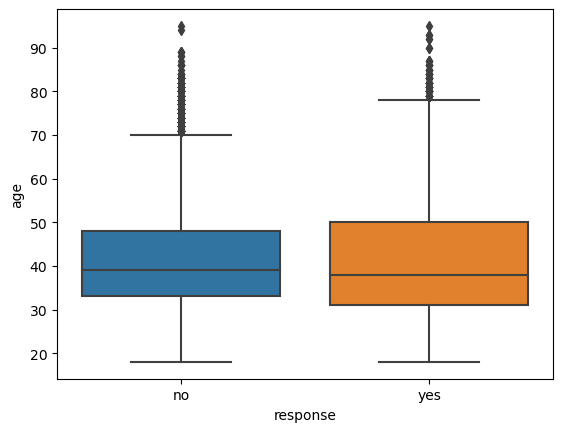

In [129]:
sns.boxplot(data = inp1, x = 'response', y='age')
plt.show()

#### Making buckets from the age column

In [130]:
pd.cut(inp1.age, [0, 30,40,50,60, 9999], labels = ['<30', '30-40','40-50','50-60','60+'])

0        50-60
1        40-50
2        30-40
3        40-50
4        30-40
         ...  
45206    50-60
45207      60+
45208      60+
45209    50-60
45210    30-40
Name: age, Length: 45191, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [131]:
inp1.age.head()

0    58.0
1    44.0
2    33.0
3    47.0
4    33.0
Name: age, dtype: float64

In [132]:
inp1['age_group'] = pd.cut(inp1.age, [0, 30,40,50,60, 9999], labels = ['<30', '30-40','40-50','50-60','60+'])

In [134]:
inp1.age_group.value_counts(normalize = True)

30-40    0.391206
40-50    0.248611
50-60    0.178376
<30      0.155518
60+      0.026288
Name: age_group, dtype: float64

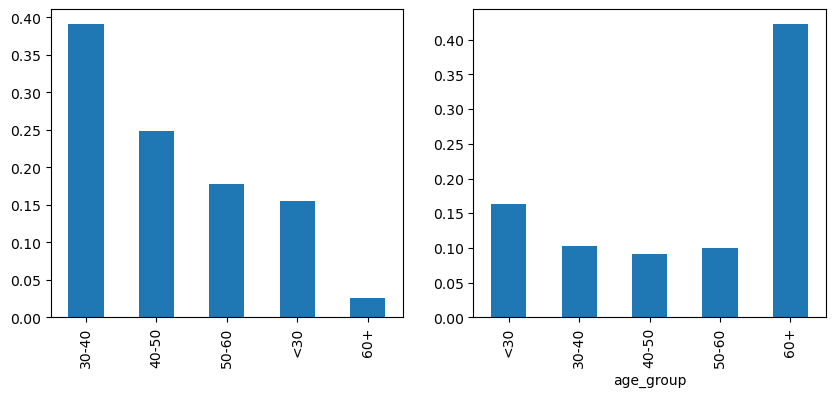

In [136]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize = True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby('age_group')['response_flag'].mean().plot.bar()
plt.show()

<Axes: ylabel='job'>

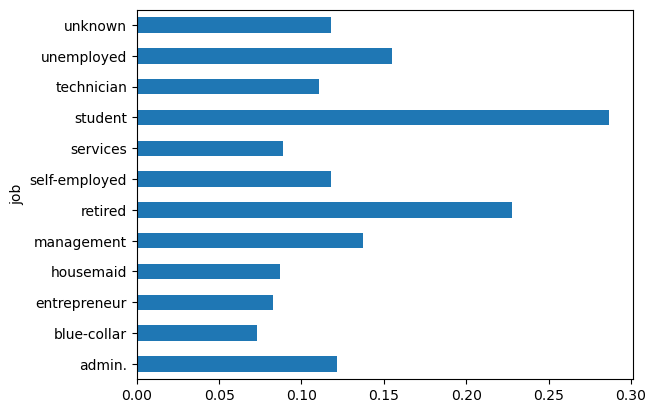

In [137]:
inp1.groupby('job')['response_flag'].mean().plot.barh()

### Segment-6, Multivariate analysis 

#### More than 2 variables 

In [138]:
pd.pivot_table(data = inp1, index = 'education', columns = 'marital', values = 'response_flag')

marital,divorced,married,single
education,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


In [153]:
res = pd.pivot_table(data = inp1, index = 'education', columns = 'marital', values = 'response_flag')
res

marital,divorced,married,single
education,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


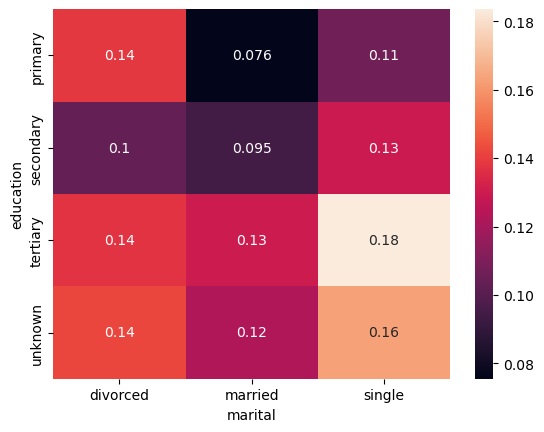

In [155]:
sns.heatmap(res, annot = True)
plt.show()

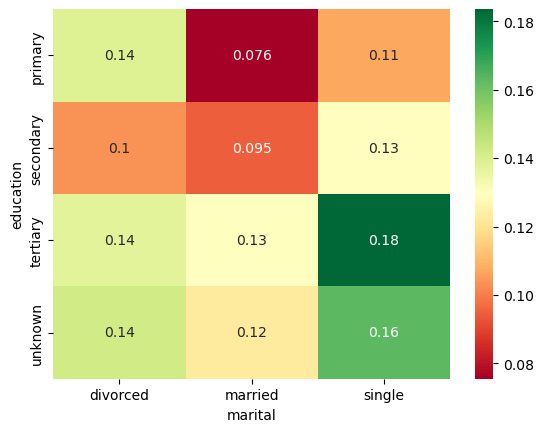

In [159]:
sns.heatmap(res, annot = True, cmap = "RdYlGn" )
plt.show()

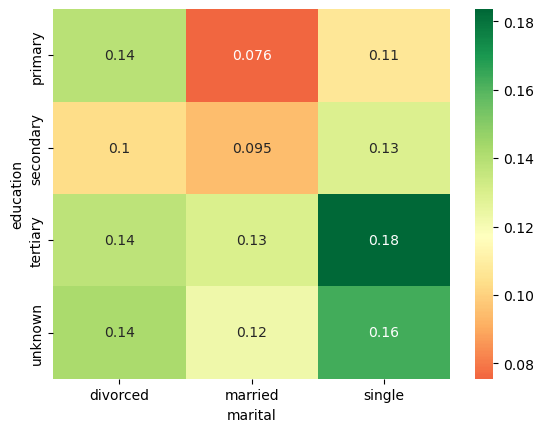

In [160]:
sns.heatmap(res, annot= True, cmap = 'RdYlGn', center = 0.117)
plt.show()

#### Job vs Marital vs Response

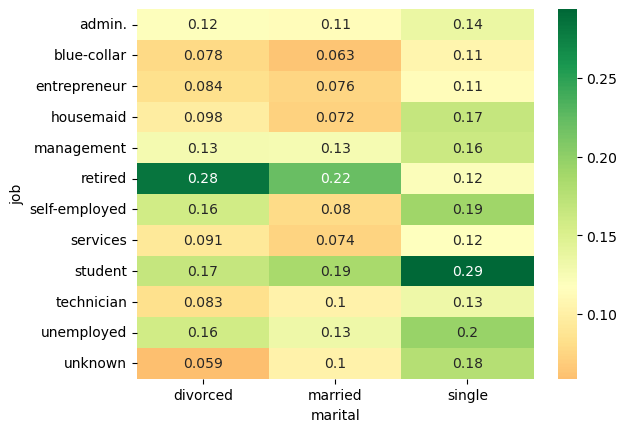

In [162]:
res = pd.pivot_table(data = inp1, index = 'job', columns = 'marital', values = 'response_flag')
sns.heatmap(res, annot = True, cmap='RdYlGn', center = 0.117)
plt.show()

#### Education vs poutcome vs response



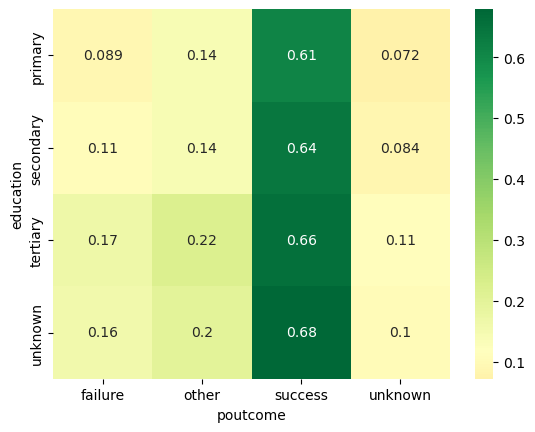

In [164]:
res = pd.pivot_table(data = inp1, index = 'education', columns = 'poutcome', values = 'response_flag')
sns.heatmap(res, annot = True, cmap = 'RdYlGn', center = 0.117)
plt.show()

In [165]:
inp1[inp1.pdays>0].response_flag.mean()

0.23061076102762967

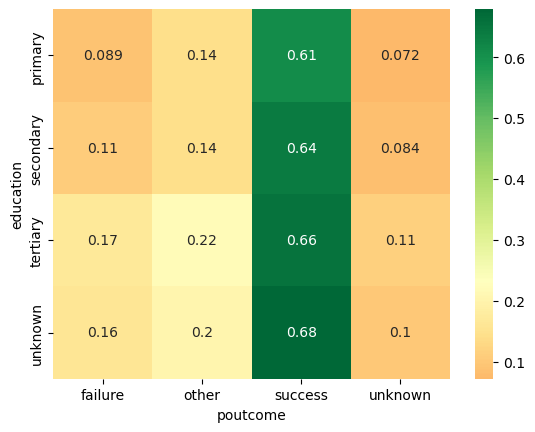

In [168]:
res = pd.pivot_table(data = inp1, index = 'education', columns = 'poutcome', values = 'response_flag')
sns.heatmap(res, annot = True, cmap = 'RdYlGn', center = 0.2308)
plt.show()